In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

%precision 3
%matplotlib inline

In [2]:
#모집단은 언제나 평균 4, 표준편차 0.8인 정규분포라 가정
population=stats.norm(loc=4, scale=0.8)

In [3]:
sample_mean_array=np.zeros(10000)

In [4]:
np.random.seed(1)
for i in range(0,10000):
  sample=population.rvs(size=10)
  sample_mean_array[i]=sp.mean(sample) #rvs: 랜덤 표본 생성

<ipython-input-4-febabc9e9a67>:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i]=sp.mean(sample)


In [5]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [6]:
sp.mean(sample_mean_array)

<ipython-input-6-cede0e2d07e0>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sample_mean_array)


4.004202422791747

In [7]:
sp.std(sample_mean_array,ddof=0)

<ipython-input-7-2b58626ac6e0>:1: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(sample_mean_array,ddof=0)


0.25134551686757256

<ipython-input-8-66d59ad9fcd2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_mean_array, color='black')


<Axes: ylabel='Density'>

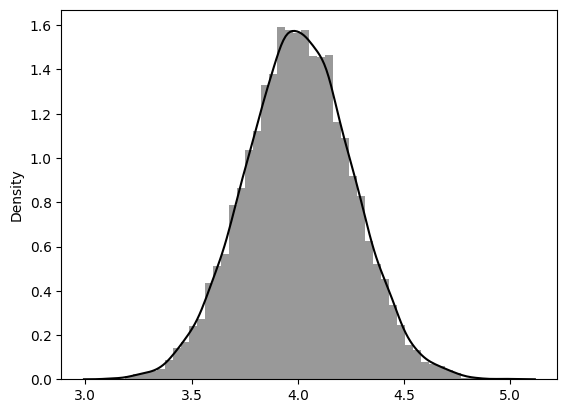

In [8]:
sns.distplot(sample_mean_array, color='black')

샘플사이즈가 커질수록 표본평균은 모평균에 가까워지는가?

In [9]:
size_array=np.arange(10,100100,100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [10]:
sample_mean_array_size=np.zeros(len(size_array))

In [11]:
np.random.seed(1)
for i in range(0,len(size_array)):
  sample=population.rvs(size=size_array[i])
  sample_mean_array_size[i]=sp.mean(sample)

<ipython-input-11-b7581680f787>:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array_size[i]=sp.mean(sample)


Text(0, 0.5, 'sample mean')

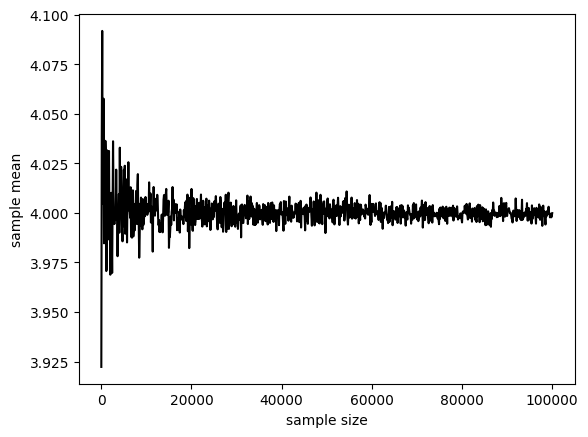

In [12]:
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [13]:
#표본평균 몇번이고 계산하는 함수
def calc_sample_mean(size, n_trial):
  sample_mean_array=np.zeros(n_trial)
  for i in range(0, n_trial):
    sample=population.rvs(size=size)
    sample_mean_array[i]=sp.mean(sample)
  return(sample_mean_array)

In [14]:
np.random.seed(1)
sp.mean(calc_sample_mean(10,10000))

<ipython-input-13-e891fa444f85>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i]=sp.mean(sample)
<ipython-input-14-50ecdd7169a0>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(calc_sample_mean(10,10000))


4.004202422791747

In [16]:
#샘플사이즈를 바꿨을 때 표본평균의 분산
np.random.seed(1)
#샘플사이즈 10
size_10=calc_sample_mean(10,10000)
size_10_df=pd.DataFrame({
    "sample_mean":size_10,
    "size":np.tile("size 10",10000)})
#샘플사이즈 20
size_20=calc_sample_mean(20,10000)
size_20_df=pd.DataFrame({
    "sample_mean":size_20,
    "size":np.tile("size 20",10000)})
#샘플사이즈 30
size_30=calc_sample_mean(30,10000)
size_30_df=pd.DataFrame({
    "sample_mean":size_30,
    "size":np.tile("size 30",10000)})
#종합
sim_result=pd.concat([size_10_df, size_20_df, size_30_df])
#결과 표시
print(sim_result.head())

<ipython-input-13-e891fa444f85>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i]=sp.mean(sample)
<ipython-input-13-e891fa444f85>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i]=sp.mean(sample)
<ipython-input-13-e891fa444f85>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i]=sp.mean(sample)


   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


<Axes: xlabel='size', ylabel='sample_mean'>

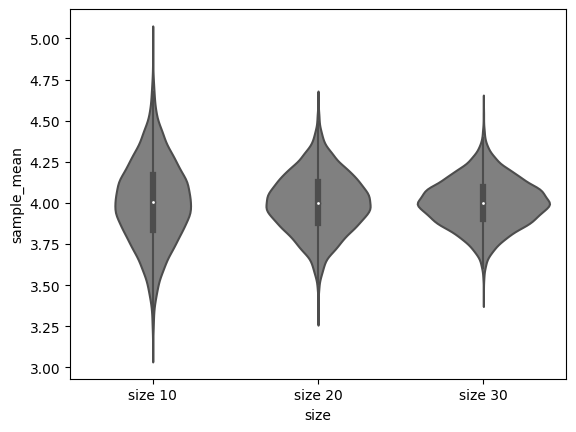

In [17]:
sns.violinplot(x="size", y="sample_mean", data=sim_result, color='gray')

샘플사이즈가 커질수록 표본평균의 표준편차는 작아진다

In [18]:
size_array=np.arange(2,102,2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [19]:
sample_mean_std_array=np.zeros(len(size_array))

In [20]:
np.random.seed(1)
for i in range(0,len(size_array)):
  sample_mean=calc_sample_mean(size_array[i],100)
  sample_mean_std_array[i]=sp.std(sample_mean,ddof=1)

<ipython-input-13-e891fa444f85>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean_array[i]=sp.mean(sample)
<ipython-input-20-cb8b0724206f>:4: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sample_mean_std_array[i]=sp.std(sample_mean,ddof=1)


Text(0, 0.5, 'mean_std value')

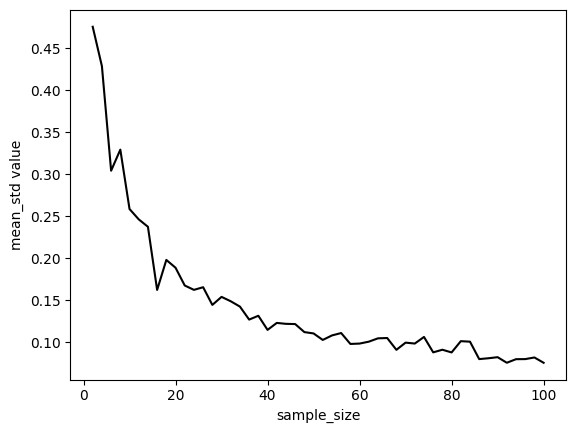

In [21]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel("sample_size")
plt.ylabel("mean_std value")

샘플사이즈가 커지면 표준오차는 작아진다

In [22]:
standard_error=0.8/sp.sqrt(size_array)
standard_error

<ipython-input-22-67216799e6aa>:1: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  standard_error=0.8/sp.sqrt(size_array)


array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

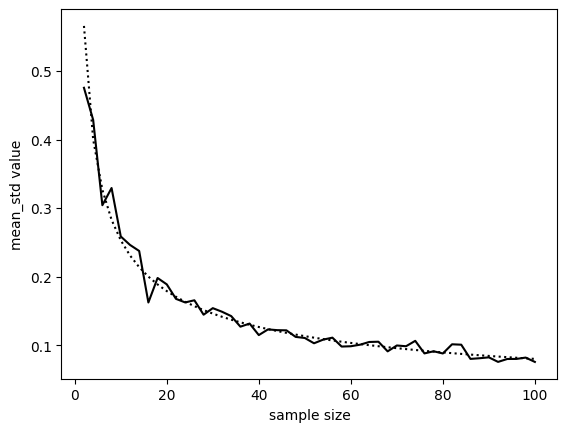

In [23]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

표본분산의 평균값은 모분산과 차이가 있다

In [24]:
sample_var_array=np.zeros(10000)

In [26]:
np.random.seed(1)
for i in range(0,10000):
  sample=population.rvs(size=10)
  sample_var_array[i]=sp.var(sample,ddof=0)

<ipython-input-26-aefe1159cf92>:4: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sample_var_array[i]=sp.var(sample,ddof=0)


In [27]:
sp.mean(sample_var_array)

<ipython-input-27-53cba9c2cbf2>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sample_var_array)


0.5746886877332101

In [29]:
#불편분산으로 보정: 불편분산의 평균값은 모분산
np.random.seed(1)
for i in range(0,10000):
  sample=population.rvs(size=10)
  sample_var_array[i]=sp.var(sample,ddof=1)
sp.mean(sample_var_array)

<ipython-input-29-86d0f4cfde80>:5: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sample_var_array[i]=sp.var(sample,ddof=1)
<ipython-input-29-86d0f4cfde80>:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(sample_var_array)


0.6385429863702334

샘플사이즈가 크면 불편분산은 모분산에 가까워진다

In [30]:
size_array=np.arange(10,100100,100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [31]:
unbias_var_array_size=np.zeros(len(size_array))

In [32]:
np.random.seed(1)
for i in range(0,len(size_array)):
  sample=population.rvs(size=size_array[i])
  unbias_var_array_size[i]=sp.var(sample,ddof=1)

<ipython-input-32-8bdf7f4b038d>:4: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  unbias_var_array_size[i]=sp.var(sample,ddof=1)


Text(0, 0.5, 'unbias var')

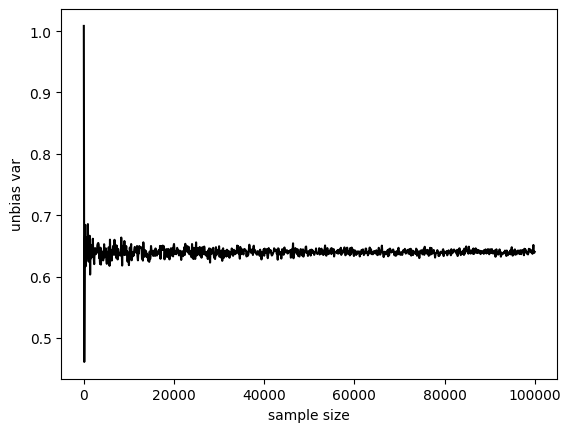

In [33]:
plt.plot(size_array, unbias_var_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

중심극한정리: 모집단 분포가 무엇이든 간에 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까워진다

<ipython-input-39-2968f9bfc95f>:10: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  count_coin[i]=sp.sum(
<ipython-input-39-2968f9bfc95f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_coin, color='black')


<Axes: ylabel='Density'>

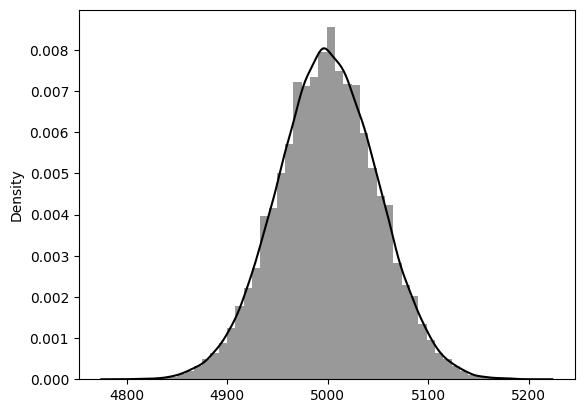

In [39]:
n_size=10000
n_trial=50000
#앞면이면 1, 뒷면이면 0
coin=np.array([0,1])
#앞면이 나온 횟수
count_coin=np.zeros(n_trial)
#동전을 n_size번 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0,n_trial):
  count_coin[i]=sp.sum(
      np.random.choice(coin, size=n_size, replace=True)
  )
sns.distplot(count_coin, color='black')